#**Importing required libraries:**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(color_codes = True)
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from sklearn.impute import SimpleImputer


# **Loading Dataset**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Kamaleshen28/Data-Science/main/processedTerm2Dataset.csv")
print(df.shape)
df.head()

(146, 9)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18.0,Male,14.0,Single,3.0,4.0,29562.0,112.0
1,TM195,19.0,Male,15.0,Single,2.0,3.0,31836.0,75.0
2,TM195,19.0,Female,14.0,Partnered,4.0,3.0,30699.0,66.0
3,TM195,19.0,Male,12.0,Single,3.0,3.0,32973.0,85.0
4,TM195,20.0,Male,13.0,Partnered,4.0,2.0,35247.0,47.0


In [3]:
df['Product'].unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [4]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,28.006849,15.150685,3.164384,3.075342,48053.650685,88.034247
std,6.259334,1.266777,0.813908,0.743576,8852.564836,30.364093
min,18.000000,12.000000,2.000000,2.000000,29562.000000,38.000000
25%,23.000000,14.000000,3.000000,3.000000,42069.000000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,48891.000000,85.000000
75%,33.000000,16.000000,4.000000,3.000000,53439.000000,105.250000
max,46.000000,18.000000,5.000000,5.000000,68220.000000,180.000000


#**Hypothesis testing**

In [5]:
import scipy.stats as st

### **Hypothesis 1:**


Average income of customer who bought TM195 model is less than average income of all the customer.

**Z Test, Left Tailed**


**H0** : μ = average income of all the customer      
   **Ha** : μ < average income of all the customer

In [6]:
sample = df[df['Product'] == 'TM195'].sample(35,random_state=2)

In [7]:
#H0 : μ = 48053.65 and Ha : μ < 48053.65

n = 35
xbar = sample.Income.mean()
mu = df['Income'].mean()
sigma = df['Income'].std()  #standard deviation of population
alpha = 0.1
print(xbar, mu, sigma)

46129.71428571428 48053.650684931505 8852.564835892992


In [8]:
z_critical = st.norm.ppf(alpha) 
z_critical   #z value corresponding to left side area(0.1)

-1.2815515655446004

In [9]:
z = (xbar-mu)/(sigma/np.sqrt(n))
z

-1.2857472886534715

In [10]:
if (z > z_critical):   #left tail
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Reject null hypothesis


*   There is enough evidence to conclude that average income of customer who bought TM195 model is less than average income of all the customer.
*   From this we can infer that model TM195 is less cost and customer with low income purchse this model(TM195)







### **Hypothesis 2:**


Married customers are buying treadmill more than single customers

**Z Test, Right Tailed, Using P-value**

**H0** : μ = 0.5     
   **Ha** : μ > 0.5

In [11]:
sample = df.sample(32,random_state=2)

In [12]:
samplePerOfMarried = (sample[sample['MaritalStatus'] == 'Partnered'].MaritalStatus.count()/32)
sample[sample['MaritalStatus'] == 'Partnered'].MaritalStatus.count()

21

In [13]:
#H0 : μ = 0.5, Ha : μ > 0.5

n = 32
xbar = samplePerOfMarried
mu = 0.5
alpha = 0.05
print(xbar)

0.65625


In [14]:
z = (xbar - mu)/np.sqrt(((mu)*(1-mu))/n)
z

1.7677669529663687

In [15]:
p= (1 - st.norm.cdf(abs(z))) # (1 - 0.9608)
p

0.03854993587177091

In [16]:
if (p > alpha):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Reject null hypothesis


*   There is enough evidence that Married customers are buying treadmill more than single customers.
*   So the company has to create awareness among people btw age 18-25 to expand their sale(single).



### **Hypothesis 3:**


Female customers fitness avg is less than the mean fitness of all the customers

**t Test, Left Tailed**

**H0** : μ = avg fitness of all customers 
   **Ha** : μ < avg fitness of all customers

In [17]:
sample = df[df['Gender'] == 'Female'].sample(32,random_state=2)

In [18]:
#H0 : μ = 3.075 and Ha : μ < 3.075

n = 32
degrees_of_freedom = n-1
xbar = sample.Fitness.mean()
mu = df['Fitness'].mean()
s = sample['Fitness'].std()
alpha = 0.1
print(xbar, mu, s)

2.90625 3.0753424657534247 0.640532792341279


In [19]:
t = (xbar - mu)/(s / np.sqrt(n))
t

-1.493337179441019

In [20]:
t_critical = (st.t.ppf(alpha, degrees_of_freedom))
t_critical

-1.3094635471008582

In [21]:
if (t > t_critical): #left tail
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Reject null hypothesis


*   There is enough evidence to conclude that female customers fitness avg is less than the mean fitness of all the customers.
*   So company can try to create awareness among female to expand sales with female customers



### **Hypothesis 4:**


The avg age of customer who bought model TM498 is not same as the avg age of all the customers.

**t Test, two tailed test**


**H0** : μ = average age of all the customer
   **Ha** : μ != average age of all the customer

In [22]:
sample = df[df['Product'] == 'TM498'].sample(32,random_state=2)

In [23]:
#H0 : μ = 28.00684, Ha : μ != 28.00684

n = 32
degrees_of_freedom = n-1
xbar = sample['Age'].mean()
mu = df['Age'].mean()
s = sample['Age'].std()
alpha = 0.05
print(xbar, mu, s)

28.75 28.006849315068493 6.252741334290775


In [24]:
t = (xbar - mu)/(s / np.sqrt(n))
t

0.6723283253400089

In [25]:
t_critical = st.t.ppf(alpha/2, degrees_of_freedom)
t_critical

-2.039513446396408

In [26]:
if (abs(t) < abs(t_critical)):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Null hypothesis cannot be rejected


*   There is no enough evidence that the avg age of customer who bought model TM498 is not same as the avg age of all the customers.
*   From this we can infer that there is high chance that there doesn't exist any solid relatoinship between age and model, so different age groups doesn't go for different model.



### **Hypothesis 5:**


Variance of income of customers who bought TM195 model is less than the variance of income of all the customers

**chi square Test, Left Tailed**

**H0** : σ2 = variance(income) of all customers
   **Ha** : σ2 < variance(income) of all customers

In [27]:
sample = df[df['Product'] == 'TM195'].sample(32,random_state=2)

In [28]:
#H0 : σ2 = 78367904.17, Ha : σ2 < 78367904.17

n = 32
degrees_of_freedom = n-1
s_square = (sample['Income'].std())**2
sigma_square = (df['Income'].std())**2
alpha = 0.05
print(s_square, sigma_square)

88605501.08770163 78367904.17368911


In [29]:
chi_square = ((n-1)*s_square)/sigma_square
chi_square

35.04968727543104

In [30]:
chi_square_critical =  st.chi2.ppf(alpha, degrees_of_freedom)
chi_square_critical

19.280568559129293

In [31]:
if (chi_square > chi_square_critical):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Null hypothesis cannot be rejected


*   There is no enough evidence to conclude that variance of income of customers who bought TM195 model is less than the variance of income of all the customers
*   From this we get to know that few customers with high income also purchase TM195 which results in high varince than population



### **Hypothesis 6:**


Average income of customer who bought TM798 model is greater than average income of all the customer.

**Z Test, Right Tailed**


**H0** : μ = average income of all the customer      
   **Ha** : μ > average income of all the customer

In [32]:
sample = df[df['Product'] == 'TM798'].sample(13,random_state=2)

In [33]:
n = 13
xbar = sample[sample['Product'] == 'TM798'].Income.mean()
mu = df['Income'].mean()
sigma = df['Income'].std()
alpha = 0.05
print(xbar, mu, sigma)

55842.230769230766 48053.650684931505 8852.564835892992


In [34]:
z_critical = abs(st.norm.ppf(alpha)) 
z_critical

1.6448536269514729

In [35]:
z = (xbar-mu)/(sigma/np.sqrt(n))
z

3.1722021106401614

In [36]:
if (z < z_critical):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Reject null hypothesis


We don't have enough evidence to conclude that average income of customer who bought TM798 model is greater than average income of all the customer.

### **Hypothesis 7:**


The avg miles run by male customer is greater than population average

**t Test, Right Tailed**

**H0** : μ = population avg of miles    
   **Ha** : μ > population avg of miles

In [37]:
sample = df[df['Gender'] == 'Male'].sample(32,random_state=2)

In [38]:
n = 32
degrees_of_freedom = n-1
xbar = sample.Miles.mean()
mu = df['Miles'].mean()
s = sample['Miles'].std() 
alpha = 0.05
print(xbar, mu, s)

92.875 88.03424657534246 30.928377198440792


In [39]:
t = (xbar - mu)/(s / np.sqrt(n))
t

0.885382262552051

In [40]:
t_critical = abs(st.t.ppf(alpha, degrees_of_freedom))
t_critical

1.6955187891366654

In [41]:
if (t < t_critical):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Null hypothesis cannot be rejected


We don't have enough evidence to conclude that the avg miles run by male customer is greater than population average

### **Hypothesis 8:**


Avg usage of female customers is less than the avg usage of all the customers

**T Test, Left Tailed using P-value**

**H0** : μ = usage avg of all customers
   **Ha** : μ < usage avg of all customers

In [42]:
sample = df[df['Gender'] == 'Female'].sample(32,random_state=2)

In [43]:
n = 32
degrees_of_freedom = n-1
xbar = sample['Usage'].mean()
mu = df['Usage'].mean()
s = sample['Usage'].std()
alpha = 0.05
print(xbar, mu)

3.0 3.164383561643836


In [44]:
t = (xbar - mu)/(s / np.sqrt(n))
t

-1.1038317496958057

In [45]:
p_val = (st.t.cdf(abs(t), degrees_of_freedom))
p_val

0.8609194636970525

In [46]:
if (p_val > alpha):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Null hypothesis cannot be rejected


We don't have enough evidence to conclude that avg usage of female customers is less than the avg usage of all the customers.

### **Hypothesis 9:**


Male customers buying treadmill more than female customers

**Z Test, Right Tailed, Using P-value**

**H0** : μ = 0.5     
   **Ha** : μ > 0.5

In [47]:
sample = df.sample(32,random_state=2)

In [48]:
samplePerOfMale = (sample[sample['Gender'] == 'Male'].Gender.count()/32)
sample[sample['Gender'] == 'Male'].Gender.count()

19

In [49]:
n = 32
xbar = samplePerOfMale
mu = 0.5
alpha = 0.05
print(xbar)

0.59375


In [50]:
z = (xbar - mu)/np.sqrt(((mu)*(1-mu))/n)
z

1.0606601717798212

In [51]:
p= (1 - st.norm.cdf(z))
print("p :",p)

p : 0.1444221831732424


In [52]:
if (p > alpha):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Null hypothesis cannot be rejected


We don't have enough evidence to conclude that male customers are buying treadmill more than female customers.



### **Hypothesis 9:**


Percentage of Male customers buying the treadmill is not same as percentage of female customers

**Z Test, two Tailed, Using P-value**

**H0** : μ = 0.5     
   **Ha** : μ != 0.5

In [53]:
sample = df.sample(32,random_state=2)

In [54]:
samplePerOfMale = (sample[sample['Gender'] == 'Male'].Gender.count()/32)
sample[sample['Gender'] == 'Male'].Gender.count()

19

In [55]:
n = 32
xbar = samplePerOfMale
mu = 0.5
alpha = 0.05
print(xbar)

0.59375


In [56]:
z = (xbar - mu)/np.sqrt(((mu)*(1-mu))/n)
z

1.0606601717798212

In [57]:
p_val = (1 - st.norm.cdf(abs(z))) * 2
p_val

0.2888443663464848

In [58]:
if (p_val > alpha):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Null hypothesis cannot be rejected


We don't have  enough evidence to conclude that percentage of Male customers buying the treadmill is not same as percentage of female customers.

### **Hypothesis 10:**


Variance of miles run by customers who bought TM195 model is less than the variance of miles run by all the customers

**chi square Test, Left Tailed**


**H0** : σ2 = variance(miles) of all customers
   **Ha** : σ2 < variance(miles) of all customers

In [59]:
sample = df[df['Product'] == 'TM195'].sample(32,random_state=2)

In [60]:
n = 32
degrees_of_freedom = n-1
s_square = (sample['Miles'].std())**2
sigma_square = (df['Miles'].std())**2
alpha = 0.01
print(s_square, sigma_square)

593.7570564516129 921.9781294284363


In [61]:
chi_square = ((n-1)*s_square)/sigma_square
chi_square

19.96410561431729

In [62]:
chi_square_critical =  st.chi2.ppf(alpha, degrees_of_freedom)
chi_square_critical

15.65545640168138

In [63]:
if (chi_square > chi_square_critical):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Null hypothesis cannot be rejected


We don't have  enough evidence to conclude that variance of miles run by customers who bought TM195 model is less than the variance of miles run by all the customers.

# **Feature Selection**

**Low Variance Filter**

In [64]:
from sklearn.feature_selection import VarianceThreshold

fs = df.copy()
labelEnc = LabelEncoder()

for i in fs.columns:
  fs[i] = labelEnc.fit_transform(fs[i])

var_thres = VarianceThreshold(threshold=0)
var_thres.fit(fs)

VarianceThreshold(threshold=0)

In [65]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

Observation: 
*   There is no column with Variance = 0, which means no column with constant values. So there is no alteration in the dataset.




 

**Removing Duplicate Features**

In [66]:
fs = fs.T
df.shape

(146, 9)

In [67]:
print(fs.duplicated().sum())

0


Observation: 
*   There is no duplicated column. So the dataset remains the same.


In [68]:
fs = fs.T
fs.shape

(146, 9)

**Removing highly Correlated columns**

In [69]:
fs.corr()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,1.000000,-0.101206,0.180210,0.220397,0.067689,0.290129,0.379937,0.288146,0.310728
Age,-0.101206,1.000000,-0.067740,0.318608,-0.221333,-0.067787,-0.076098,0.649050,-0.087363
Gender,0.180210,-0.067740,1.000000,0.009194,0.041108,0.201045,0.259494,0.096681,0.274211
Education,0.220397,0.318608,0.009194,1.000000,-0.100244,0.198924,0.244117,0.490914,0.108056
MaritalStatus,0.067689,-0.221333,0.041108,-0.100244,1.000000,0.130322,0.210011,-0.146966,0.190731
Usage,0.290129,-0.067787,0.201045,0.198924,0.130322,1.000000,0.480794,0.158336,0.652274
Fitness,0.379937,-0.076098,0.259494,0.244117,0.210011,0.480794,1.000000,0.174837,0.713348
Income,0.288146,0.649050,0.096681,0.490914,-0.146966,0.158336,0.174837,1.000000,0.146324
Miles,0.310728,-0.087363,0.274211,0.108056,0.190731,0.652274,0.713348,0.146324,1.000000


In [70]:
col_corr = set()
corr_matrix = fs.corr()
for i in range(len(corr_matrix.columns)):
  for j in range(i):
    if abs(corr_matrix.iloc[i, j]) > 0.75:
      colname = corr_matrix.columns[i] 
      col_corr.add(colname)

len(set(col_corr))

0

Obervation:
*   No columns dropped as no two columns have a correlation more than 7.5



 **mutual info**

In [71]:
df.dtypes

Product           object
Age              float64
Gender            object
Education        float64
MaritalStatus     object
Usage            float64
Fitness          float64
Income           float64
Miles            float64
dtype: object

In [72]:
numcols = list(df.select_dtypes(include='float64').columns)
numcols

['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

In [73]:
num_df = df[numcols]
num_df.head()

,Age,Education,Usage,Fitness,Income,Miles
0,18.0,14.0,3.0,4.0,29562.0,112.0
1,19.0,15.0,2.0,3.0,31836.0,75.0
2,19.0,14.0,4.0,3.0,30699.0,66.0
3,19.0,12.0,3.0,3.0,32973.0,85.0
4,20.0,13.0,4.0,2.0,35247.0,47.0


In [74]:
X= num_df.drop(labels=['Income'], axis=1)
y= num_df['Income']

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)
X_train.head()

,Age,Education,Usage,Fitness,Miles
31,25.0,16.0,3.0,3.0,85.0
127,38.0,16.0,4.0,3.0,85.0
135,23.0,16.0,4.0,5.0,140.0
121,34.0,15.0,3.0,3.0,85.0
76,19.0,14.0,3.0,3.0,64.0


In [76]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(X_train,y_train)
mutual_info

array([0.47949336, 0.13704769, 0.01435478, 0.11872474, 0.07742967])

In [77]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

Age          0.479493
Education    0.137048
Fitness      0.118725
Miles        0.077430
Usage        0.014355
dtype: float64

In [78]:
dd = pd.DataFrame(mutual_info).T

for i in dd.columns:
  if (dd[i][0] == 0):
    df.drop( i, axis=1, inplace = True)

df.shape

(146, 9)

Observation:
*   No columns dropped as there is no column with mutual information zero.



# **Feature Engineering and Dataset Imbalance Handling**


In [79]:
dfe = df

In [80]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
dfe['Product']= label_encoder.fit_transform(dfe['Product'])
 
dfe['Product'].unique()

array([0, 1, 2])

In [81]:
dfe['MaritalStatus']=label_encoder.fit_transform(dfe['MaritalStatus'])
dfe.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,0,18.0,Male,14.0,1,3.0,4.0,29562.0,112.0
1,0,19.0,Male,15.0,1,2.0,3.0,31836.0,75.0
2,0,19.0,Female,14.0,0,4.0,3.0,30699.0,66.0
3,0,19.0,Male,12.0,1,3.0,3.0,32973.0,85.0
4,0,20.0,Male,13.0,0,4.0,2.0,35247.0,47.0


In [82]:
dfe['Gender']=label_encoder.fit_transform(dfe['Gender'])
dfe.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,0,18.0,1,14.0,1,3.0,4.0,29562.0,112.0
1,0,19.0,1,15.0,1,2.0,3.0,31836.0,75.0
2,0,19.0,0,14.0,0,4.0,3.0,30699.0,66.0
3,0,19.0,1,12.0,1,3.0,3.0,32973.0,85.0
4,0,20.0,1,13.0,0,4.0,2.0,35247.0,47.0


In [83]:
X = dfe.loc[:, dfe.columns != 'Gender']
y = dfe['Gender']

In [84]:
from sklearn.model_selection import train_test_split
 
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
 
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (102, 8)
Number transactions y_train dataset:  (102,)
Number transactions X_test dataset:  (44, 8)
Number transactions y_test dataset:  (44,)


In [85]:
# logistic regression object
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
lr = LogisticRegression()
 
# train the model on train set
lr.fit(X_train, y_train.ravel())
 
predictions = lr.predict(X_test)
 
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.22      0.31        18
           1       0.61      0.85      0.71        26

    accuracy                           0.59        44
   macro avg       0.56      0.53      0.51        44
weighted avg       0.57      0.59      0.55        44



In [86]:
f1_score(y_test, predictions, average='macro')

0.5086848635235732

In [87]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
 
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
 
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 54
Before OverSampling, counts of label '0': 48 

After OverSampling, the shape of train_X: (108, 8)
After OverSampling, the shape of train_y: (108,) 

After OverSampling, counts of label '1': 54
After OverSampling, counts of label '0': 54


In [88]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)
 
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.36      0.22      0.28        18
           1       0.58      0.73      0.64        26

    accuracy                           0.52        44
   macro avg       0.47      0.48      0.46        44
weighted avg       0.49      0.52      0.49        44



In [89]:
f1_score(y_test, predictions, average='macro')

0.4599649327878434

In [90]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
 
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
 
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())
 
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
 
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 54
Before Undersampling, counts of label '0': 48 

After Undersampling, the shape of train_X: (96, 8)
After Undersampling, the shape of train_y: (96,) 

After Undersampling, counts of label '1': 48
After Undersampling, counts of label '0': 48


In [91]:
lr2 = LogisticRegression()
lr2.fit(X_train_miss, y_train_miss.ravel())
predictions = lr2.predict(X_test)
 
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.36      0.22      0.28        18
           1       0.58      0.73      0.64        26

    accuracy                           0.52        44
   macro avg       0.47      0.48      0.46        44
weighted avg       0.49      0.52      0.49        44



In [92]:
f1_score(y_test, predictions, average='macro')

0.4599649327878434

Higher the F1 Score the better, So with this we understand that SMOTE works better in this case. 

In [93]:
dfc = dfe

In [94]:
prod_gen_fit=pd.crosstab(index=dfc['Product'],columns=[dfc['Gender'],dfc['Fitness']])
prod_gen_fit

Gender    0           1            
Fitness 2.0 3.0 4.0 2.0 3.0 4.0 5.0
Product                            
0        10  25   3   4  27   6   1
1         6  18   3   6  20   4   0
2         0   0   1   0   2   2   8

In [95]:
pd.pivot_table(dfc,'Income',index=['Product','Gender'],columns=['MaritalStatus'])

MaritalStatus              0             1
Product Gender                            
0       0       45480.000000  45742.384615
        1       50267.368421  43265.842105
1       0       50840.142857  47666.538462
        1       48947.850000  47071.800000
2       0                NaN  53536.000000
        1       59761.000000  53372.571429

In [96]:
dfc.groupby(dfc.Product).mean()

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,,,,,,,,
0,28.157895,0.500000,14.986842,0.421053,3.052632,2.960526,46168.184211,81.947368
1,28.666667,0.526316,15.070175,0.403509,3.070175,2.912281,48791.263158,87.350877
2,24.230769,0.923077,16.461538,0.615385,4.230769,4.461538,55842.230769,126.615385


# **Regression Model**

In [97]:
df['Gender'] = df['Gender'].replace('Male', 0)
df['Gender'] = df['Gender'].replace('Female', 1)
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 0)
df['MaritalStatus'] = df['MaritalStatus'].replace('Partnered', 1)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,0,18.0,1,14.0,1,3.0,4.0,29562.0,112.0
1,0,19.0,1,15.0,1,2.0,3.0,31836.0,75.0
2,0,19.0,0,14.0,0,4.0,3.0,30699.0,66.0
3,0,19.0,1,12.0,1,3.0,3.0,32973.0,85.0
4,0,20.0,1,13.0,0,4.0,2.0,35247.0,47.0


In [98]:
one_hot = pd.get_dummies(df['Product'])
# Drop column Product as it is now encoded
df = df.drop('Product',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df.head()

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,0,1,2
0,18.0,1,14.0,1,3.0,4.0,29562.0,112.0,1,0,0
1,19.0,1,15.0,1,2.0,3.0,31836.0,75.0,1,0,0
2,19.0,0,14.0,0,4.0,3.0,30699.0,66.0,1,0,0
3,19.0,1,12.0,1,3.0,3.0,32973.0,85.0,1,0,0
4,20.0,1,13.0,0,4.0,2.0,35247.0,47.0,1,0,0


**Training and Testing Dataset**

In [99]:
from sklearn.model_selection import train_test_split
y=df['Fitness'].values
x=df.drop('Fitness',axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70,test_size=0.30, random_state=0)

We have used, train_test_split() function that we imported from sklearn to split the data. Notice we have used test_size=0.30 to make the test data 30% of the original data. The rest 70% is used for training.

# **LinearRegression**

Linear regression uses a linear model to predict the relationship between two or more variables or factors.

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [101]:
linearRegressor=LinearRegression()
linearRegressor.fit(x_train, y_train)
print('Train accuracy score : ', linearRegressor.score(x_train, y_train))
print('Test accuracy score : ', linearRegressor.score(x_test, y_test))
LR = linearRegressor.score(x_train, y_train)

Train accuracy score :  0.7250457933126906
Test accuracy score :  0.014696679018929903


In [102]:
linearRegressor = LinearRegression()
linearRegressor.fit(x_train, y_train)
y_predicted = linearRegressor.predict(x_test)
mse = mean_squared_error(y_test, y_predicted)
r = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test,y_predicted)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 0.30536259947760436
R score: 0.014696679018929903
Mean Absolute Error: 0.39666737282134296


# **DecisionTree**

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed.

In [103]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(x_train, y_train)
print('Train accuracy score : ', regressor.score(x_train, y_train))
print('Test accuracy score : ', regressor.score(x_test, y_test))
DT = regressor.score(x_train, y_train)

Train accuracy score :  1.0
Test accuracy score :  -0.46666666666666656


In [104]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)
y_predicted_d = regressor.predict(x_test)
mse1 = mean_squared_error(y_test, y_predicted_d)
r1 = r2_score(y_test, y_predicted_d)
mae1 = mean_absolute_error(y_test,y_predicted_d)
print("Mean Squared Error:",mse1)
print("R score:",r1)
print("Mean Absolute Error:",mae1)

Mean Squared Error: 0.4318181818181818
R score: -0.3933333333333333
Mean Absolute Error: 0.38636363636363635


# **Random Forest**

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble.

In [105]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
print('Train accuracy score : ', rf.score(x_train, y_train))
print('Test accuracy score : ', rf.score(x_test, y_test))
RF = rf.score(x_train, y_train)

Train accuracy score :  0.9461256595431098
Test accuracy score :  0.0730666666666665


In [106]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train);
y_predicted_r = rf.predict(x_test)
mse2 = mean_squared_error(y_test, y_predicted_r)
r2 = r2_score(y_test, y_predicted_r)
mae2 = mean_absolute_error(y_test,y_predicted_r)
print("Mean Squared Error:",mse2)
print("R score:",r2)
print("Mean Absolute Error:",mae2)

Mean Squared Error: 0.2733636363636363
R score: 0.11794666666666676
Mean Absolute Error: 0.3372727272727273


# **KNN**

In [107]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor()
KNN.fit(x_train, y_train)
print('Train accuracy score : ', KNN.score(x_train, y_train))
print('Test accuracy score : ', KNN.score(x_test, y_test))
KNN1 = KNN.score(x_train, y_train)

Train accuracy score :  0.36379661016949216
Test accuracy score :  0.07013333333333349


In [108]:
KNN = KNeighborsRegressor()
KNN.fit(x_train,y_train);
y_predicted_r = KNN.predict(x_test)
mse3 = mean_squared_error(y_test, y_predicted_r)
r3 = r2_score(y_test, y_predicted_r)
mae3 = mean_absolute_error(y_test,y_predicted_r)
print("Mean Squared Error:",mse3)
print("R score:",r3)
print("Mean Absolute Error:",mae3)

Mean Squared Error: 0.28818181818181815
R score: 0.07013333333333349
Mean Absolute Error: 0.4227272727272727


# **Comparision Of Models**

In [109]:
Comparision = {
    'Models':['LinearRegression','Decision_Tree','RandomForest','KNN'],
    
        'Accuracy' : [LR, DT, RF, KNN1],
        'Mean Squared Error': [mse,mse1,mse2,mse3],
        'R score':[r,r1,r2,r3],
        'Mean Absolute Error':[mae,mae1,mae2,mae3],
        }
 
models = pd.DataFrame(Comparision)
models

,Models,Accuracy,Mean Squared Error,R score,Mean Absolute Error
0,LinearRegression,0.725046,0.305363,0.014697,0.396667
1,Decision_Tree,1.000000,0.431818,-0.393333,0.386364
2,RandomForest,0.946126,0.273364,0.117947,0.337273
3,KNN,0.363797,0.288182,0.070133,0.422727


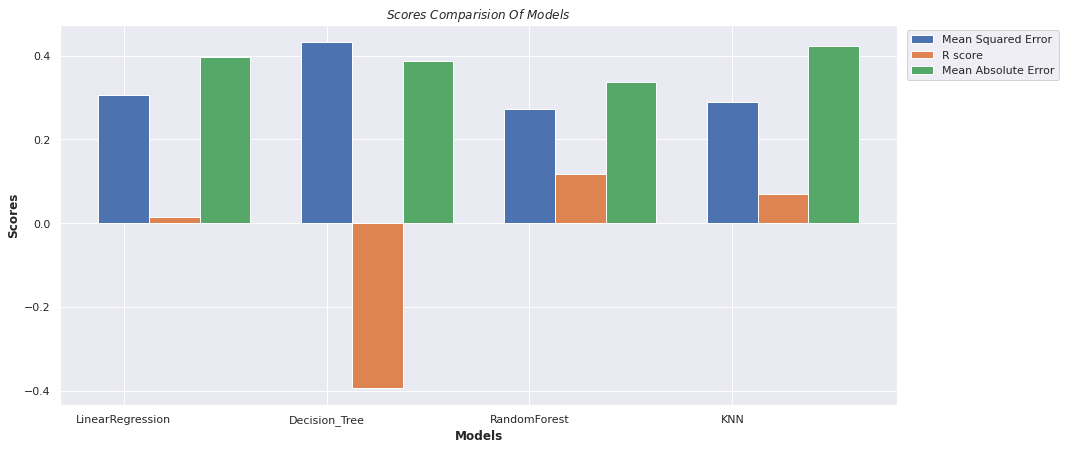

In [110]:
plt.figure(figsize=(15,7)) 
X = models['Models']
Mse = models['Mean Squared Error']
Rscore =models['R score']
Mae =models['Mean Absolute Error']
  
X_axis = np.arange(len(X))
barWidth = 0.25
# Set position of bar on X axis
pos1 = np.arange(len(X))
pos2 = [x + barWidth for x in pos1]
pos3 = [x + barWidth for x in pos2]
  
plt.bar(pos1,Mse,width=barWidth, label = 'Mean Squared Error')
plt.bar(pos2,Rscore,width=barWidth, label = 'R score')
plt.bar(pos3,Mae,width=barWidth, label = 'Mean Absolute Error')
  
plt.xticks(X_axis, X)
plt.xlabel("Models",fontweight='bold')
plt.ylabel("Scores",fontweight='bold')

plt.title("$Scores$ $Comparision$ $Of$ $Models$")
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1.0))
plt.show()